In [37]:
#importing library
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#loading the dataset
df=pd.read_csv('/kaggle/input/sundown-and-sunset-data-20102020/Sunup_Sundown_Data.csv')
#showing the dataset
df

,City,Date,Sunup,Sundown
0,toronto,2010-01-01,07:51,16:51
1,toronto,2010-01-02,07:51,16:52
2,toronto,2010-01-03,07:51,16:53
3,toronto,2010-01-04,07:51,16:54
4,toronto,2010-01-05,07:51,16:55
...,...,...,...,...
4013,toronto,2020-12-27,07:50,16:47
4014,toronto,2020-12-28,07:50,16:48
4015,toronto,2020-12-29,07:50,16:49
4016,toronto,2020-12-30,07:50,16:49


In [24]:
#getting preliminary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City     4018 non-null   object
 1   Date     4018 non-null   object
 2   Sunup    4018 non-null   object
 3   Sundown  4018 non-null   object
dtypes: object(4)
memory usage: 125.7+ KB


In [25]:
df['Month']=df['Date'].apply(lambda x:x[5:7]).astype(int)

In [26]:
df['Month']

0        1
1        1
2        1
3        1
4        1
        ..
4013    12
4014    12
4015    12
4016    12
4017    12
Name: Month, Length: 4018, dtype: int64

In [27]:
df['SunUpHour']=df['Sunup'].apply(lambda x:x[0:2]).astype(int)
df['SunUpMinute']=df['Sunup'].apply(lambda x:x[-2:]).astype(int)
df['SunDownHour']=df['Sundown'].apply(lambda x:x[0:2]).astype(int)
df['SunUPMinute']=df['Sundown'].apply(lambda x:x[-2:]).astype(int)


In [28]:
df=df.drop(['Sunup','Sundown'],axis=1)

In [29]:
df

,City,Date,Month,SunUpHour,SunUpMinute,SunDownHour,SunUPMinute
0,toronto,2010-01-01,1,7,51,16,51
1,toronto,2010-01-02,1,7,51,16,52
2,toronto,2010-01-03,1,7,51,16,53
3,toronto,2010-01-04,1,7,51,16,54
4,toronto,2010-01-05,1,7,51,16,55
...,...,...,...,...,...,...,...
4013,toronto,2020-12-27,12,7,50,16,47
4014,toronto,2020-12-28,12,7,50,16,48
4015,toronto,2020-12-29,12,7,50,16,49
4016,toronto,2020-12-30,12,7,50,16,49


In [30]:
df['City'].unique()

array(['toronto'], dtype=object)

In [31]:
df=df.drop(['City','Date'],axis=1)

In [32]:
df

,Month,SunUpHour,SunUpMinute,SunDownHour,SunUPMinute
0,1,7,51,16,51
1,1,7,51,16,52
2,1,7,51,16,53
3,1,7,51,16,54
4,1,7,51,16,55
...,...,...,...,...,...
4013,12,7,50,16,47
4014,12,7,50,16,48
4015,12,7,50,16,49
4016,12,7,50,16,49


Vi****sualizing # 

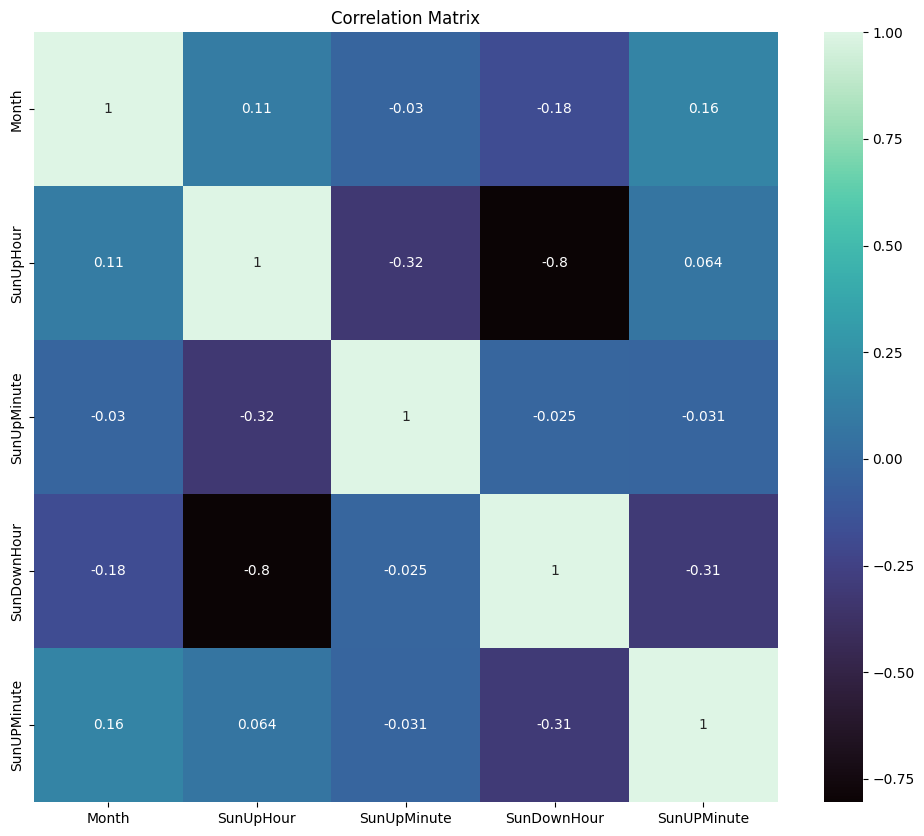

In [40]:
corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap='mako')
plt.title('Correlation Matrix')
plt.show()

In [42]:
#Splitting and Scaling the dataet
y=df['Month']
x=df.drop('Month',axis=1)
scaler=StandardScaler()
scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)


In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2812, 4)
(1206, 4)
(2812,)
(1206,)


In [46]:
#training the model
model=LogisticRegression(C=100)
model.fit(x_train,y_train)
print('The accuracy of the model is',model.score(x_test,y_test))

The accuracy of the model is 0.654228855721393


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
